<h3><center>TASK-1

**Task Name**: Stock Prediction  
**Domain**:Data Science  
**Batch**: August  

**Aim**:To Predicts Stock price by using LSTM.

#### Dataset Description:
1.The date - **"Date"**  
2.The opening price of the stock - **"Open"**  
3.The high price of that day - **"High"**  
4.The low price of that day - **"Low"**  
5.The closed price of that day - **"Close"**  
6.The amount of stocks traded during that day - **"Volume"**  
7.The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - **"Adj[usted] Close"**  

## Long Short Term Memory:  
Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is specifically designed to handle sequential data, such as time series, speech, and text. LSTM networks are capable of learning long-term dependencies in sequential data, which makes them well suited for tasks such as language translation, speech recognition, and time series forecasting.  
A traditional RNN has a single hidden state that is passed through time, which can make it difficult for the network to learn long-term dependencies. LSTMs address this problem by introducing a memory cell, which is a container that can hold information for an extended period of time. The memory cell is controlled by three gates: the input gate, the forget gate, and the output gate. These gates decide what information to add to, remove from, and output from the memory cell.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### LSTM Models

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.13.0'

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
tesla=pd.read_csv("tesla.csv")
tesla

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,07-01-2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,07-02-2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,07-06-2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [6]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,07-01-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,07-02-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,07-06-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [7]:
tesla.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [8]:
tesla.shape

(1692, 7)

In [9]:
##summary of the dataset
tesla.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [10]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [11]:
tesla.dtypes.value_counts()

float64    5
object     1
int64      1
dtype: int64

In [12]:
#checking null values
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [13]:
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [14]:
tesla1=tesla.reset_index()['Close']

In [15]:
tesla1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

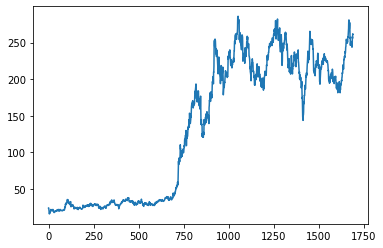

In [16]:
plt.plot(tesla1)

#### Normalizing the Data-Using MinMaxscaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tesla1=scaler.fit_transform(np.array(tesla1).reshape(-1,1))
tesla1

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [18]:
tesla1.shape

(1692, 1)

#### Preprocessing the Data-Splitting data into training and testing dataset

In [19]:
train_size=int(len(tesla1)*0.70)
test_size=len(tesla1)-train_size
train_data,test_data=tesla1[0:train_size,:],tesla1[train_size:len(tesla1),:1]

In [20]:
train_size,test_size

(1184, 508)

In [21]:
train_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.64579633],
       [0.65845174],
       [0.64857164]])

In [22]:
##convert an array of values into a dataset matrix
def create_dtset(dtset,time_step=1):
    X,Y=[],[]
    for i in range(len(dtset)-time_step-1):
        a=dtset[i:(i+time_step),0]
        X.append(a)
        Y.append(dtset[i+time_step,0])
    return np.array(X),np.array(Y)

In [23]:
#reshape into X=t,t=t+1,t+2,t+3 and Y=t+4
time_step=100
xtrain,ytrain=create_dtset(train_data,time_step)
xtest,ytest=create_dtset(test_data,time_step)

In [24]:
xtrain

array([[0.02993635, 0.02971433, 0.02279455, ..., 0.05550621, 0.05132475,
        0.05065867],
       [0.02971433, 0.02279455, 0.01258141, ..., 0.05132475, 0.05065867,
        0.05213883],
       [0.02279455, 0.01258141, 0.00114713, ..., 0.05065867, 0.05213883,
        0.05620929],
       ...,
       [0.77260949, 0.78174952, 0.79151861, ..., 0.69064534, 0.6839476 ,
        0.6589698 ],
       [0.78174952, 0.79151861, 0.77912226, ..., 0.6839476 , 0.6589698 ,
        0.64786856],
       [0.79151861, 0.77912226, 0.78330369, ..., 0.6589698 , 0.64786856,
        0.64579633]])

In [25]:
xtrain.shape,ytrain.shape

((1083, 100), (1083,))

In [26]:
xtest.shape,ytest.shape

((407, 100), (407,))

**Reshaping input to be [samples,timesteps,features] which is required for LSTM**

In [27]:
x_train=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
x_test=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [28]:
model=Sequential()
model.add(LSTM(280,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(160,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

### Model Fitting

In [29]:
history=model.fit(x_train,ytrain,validation_data=(x_test,ytest),epochs=50,batch_size=128,verbose=1)

Epoch 1/50
9/9 [==============================] - 28s 2s/step - loss: 0.0427 - mae: 0.1341 - val_loss: 0.0128 - val_mae: 0.0993
Epoch 2/50
9/9 [==============================] - 15s 2s/step - loss: 0.0044 - mae: 0.0522 - val_loss: 0.0121 - val_mae: 0.0966
Epoch 3/50
9/9 [==============================] - 15s 2s/step - loss: 0.0034 - mae: 0.0400 - val_loss: 0.0045 - val_mae: 0.0529
Epoch 4/50
9/9 [==============================] - 16s 2s/step - loss: 0.0019 - mae: 0.0255 - val_loss: 0.0032 - val_mae: 0.0452
Epoch 5/50
9/9 [==============================] - 16s 2s/step - loss: 0.0017 - mae: 0.0263 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 6/50
9/9 [==============================] - 16s 2s/step - loss: 0.0014 - mae: 0.0231 - val_loss: 0.0031 - val_mae: 0.0443
Epoch 7/50
9/9 [==============================] - 16s 2s/step - loss: 0.0014 - mae: 0.0228 - val_loss: 0.0031 - val_mae: 0.0444
Epoch 8/50
9/9 [==============================] - 16s 2s/step - loss: 0.0014 - mae: 0.0228 - val_loss: 0

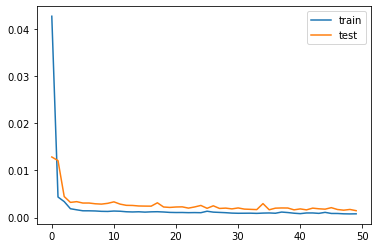

In [30]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

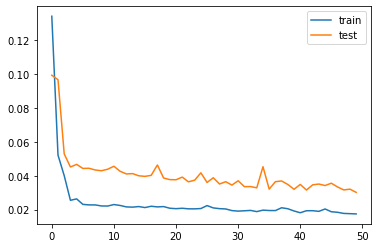

In [31]:
plt.plot(history.history['mae'],label='train')
plt.plot(history.history['val_mae'],label='test')
plt.legend()
plt.show()

#### Model Prediction

In [32]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

13/13 [==============================] - 3s 263ms/step


In [33]:
trainpredict=scaler.inverse_transform(train_predict)
testpredict=scaler.inverse_transform(test_predict)

**RMSE performace score**

In [34]:
import math
from sklearn.metrics import mean_squared_error

#### Train Data Root Mean Square Error(RMSE)

In [35]:
train_score=math.sqrt(mean_squared_error(ytrain,trainpredict))
print('Train Score: %.2f '%(train_score))

Train Score: 129.64 


#### Test Data Root Mean Square Error(RMSE)

In [36]:
test_score=math.sqrt(mean_squared_error(ytest,testpredict))
print('Test_score: %.2f '%(test_score))

Test_score: 219.33 


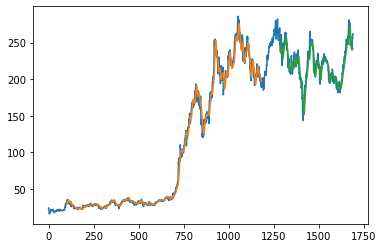

In [37]:
look_back=100
trainPredictPlot = np.empty_like(tesla1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainpredict)+look_back, :] = trainpredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(tesla1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainpredict)+(look_back*2)+1:len(tesla1)-1, :] = testpredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(tesla1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Observation:
1.Root Mean Squared Error(RMSE) of Train data is 129.64.  
2.Root Mean Squared Error(RMSE) of Test Data is 219.33  
3.The difference between RMSE of train data and test data is 90.  
4.The above plot describes the actual value vs predicted time series.The part in Orange is the training data,the part in the blue is the test data,and the part in green is the predicted Output.  